In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'
import re
import Bio
from Bio import Seq, SeqIO

In [2]:
import ete3
from ete3 import Tree, faces, TreeStyle, PhyloTree, NodeStyle, TextFace, AttrFace, SeqMotifFace

# combined phylogeny

In [31]:
treefile = '../../../../figshare/species_phylogeny/elysia_ML.contree'
outfile = '../../../../figshare/species_phylogeny/elysia_ML.pdf'
catfile = '../../../../figshare/species_phylogeny/retention_cats.txt'
#alnfile = '../../../../figshare/species_phylogeny/elysia.fa'
branch_min = 95

In [32]:
#Read in the lineages colors file and store in dictionaries 
fi = open(catfile)
catDict = {}

for line in fi:
    species, cat = line.rstrip().split('\t')
    #print(species,cat)
    
    catDict[species] = cat
    
fi.close()

colorDict = {
  "LR": "#41826D",
  "SR": "#65C2A2",
  "NF": "#E1725C",
  "nd": "#E6E6E6"
}

In [33]:
# add species and lineage information to all leaves
# color target gene red 
# color all ME034 gene green

#t = PhyloTree(treefile, alignment=alnfile, alg_format="fasta")
t = Tree(treefile, format=2)
ancestor = t.get_common_ancestor("Plakobranchus_ocellatus","Thuridilla_gracilis")
t.set_outgroup(ancestor)

t.ladderize(direction=0)
leafSet = set()

#print("Custom mode:")
for n in t.get_leaves():
    leafSet.add(n.name)
    #print(n.name)
    speciesname = ''
    speciescat = ''
    speciescolor = ''
    
    speciesname = n.name
    speciesname = speciesname.replace("_", " ")
    speciescat = catDict[speciesname]
    speciescolor = colorDict[speciescat]
    
    #print(speciesname, speciescat, speciescolor)
        
    n.add_features(species=speciesname)
    n.add_features(cat=speciescat)

    #print("Species name:", n.species, "Species category:", n.cat)

    # create a new label with a color attribute
    linF = AttrFace("cat", fgcolor=speciescolor, fsize=3)
    linF.background.color = speciescolor
    linF.margin_top = linF.margin_bottom = linF.margin_left = 7
        
    if speciesname == 'Elysia crispata genome':
        speciesF = AttrFace("species", fsize=10, fgcolor='red', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10
    
    else:
        speciesF = AttrFace("species", fsize=10, fgcolor='black', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10

    # labels aligned to the same level
    n.add_face(speciesF, 0, position='aligned')
    n.add_face(linF, 1, position='aligned')
        

In [34]:
# add lineage information to all internal nodes
style = NodeStyle()

style["size"] = 0
style["hz_line_width"] = 2
style["vt_line_width"] = 2
t.set_style(style)

for n in t.iter_descendants("postorder"):
    #print(n.name)
                
    style["size"] = 0
    style["hz_line_width"] = 2
    style["vt_line_width"] = 2
    n.set_style(style)
        
    #print(n.support, n.name)

    if float(n.support) >= branch_min and n.name not in leafSet:
        #print(int(n.support))
        n.add_features(bootstrap=int(n.support))

        supF = AttrFace("bootstrap", fgcolor="#000000", fsize=10)
        supF.margin_right = supF.margin_left = 3
        n.add_face(supF, 0, position='branch-bottom')
    

In [35]:
# add legend

ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_support = True
ts.draw_guiding_lines = True

# ts.title.add_face(TextFace("Retention Category:", fsize=10), column=0)
# for cat in colorDict:
#     ts.title.add_face(TextFace(cat, fsize=10, fgcolor=colorDict[cat]), column=0)

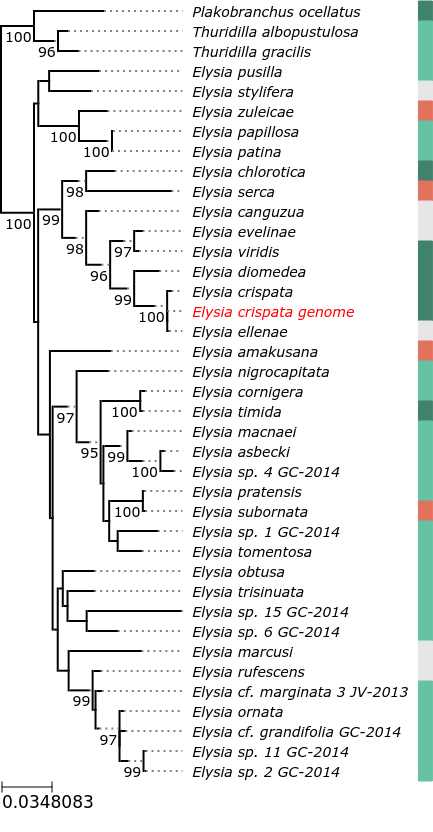

In [36]:
# render image on notebook or save to file
t.render(outfile, tree_style=ts)
t.render("%%inline", tree_style=ts)

# 28S phylogeny

In [14]:
treefile = '../../../../figshare/species_phylogeny/28S_ML.contree'
outfile = '../../../../figshare/species_phylogeny/28S_ML.pdf'
catfile = '../../../../figshare/species_phylogeny/retention_cats.txt'
alnfile = '../../../../figshare/species_phylogeny/28S.aln'
branch_min = 95

In [15]:
seqDict = {}
alnLen = 0
for record in SeqIO.parse(alnfile, "fasta"):
    name = record.id
    sequence = str(record.seq)
    #sequence = sequence.replace("n", "-")
    sequence = re.sub("[^acgt]", '-', sequence)
    alnLen = len(sequence)
    seqDict[name] = sequence

In [16]:
# add species and lineage information to all leaves
# color target gene red 
# color all ME034 gene green

#t = PhyloTree(treefile, alignment=alnfile, alg_format="fasta")
t = Tree(treefile, format=2)
ancestor = t.get_common_ancestor("GQ996619.1_Plakobranchus_ocellatus","HM187608.1_Thuridilla_gracilis")
t.set_outgroup(ancestor)

t.ladderize(direction=0)
leafSet = set()

#print("Custom mode:")
for n in t.get_leaves():
    leafSet.add(n.name)
    #print(n.name)
    speciesname = ''
    genename = ''
    speciescat = ''
    speciescolor = ''

    
    tmp = n.name.split("_")
    genename = tmp.pop(0)
    speciesname = '_'.join(tmp)
    speciesname = speciesname.replace("_", " ")
    speciescat = catDict[speciesname]
    speciescolor = colorDict[speciescat]
    
    #print(speciesname, genename, speciescat, speciescolor)
    
    n.add_features(gene=genename)
    n.add_features(species=speciesname)
    n.add_features(cat=speciescat)

    # create a new label with a color attribute
    linF = AttrFace("cat", fgcolor=speciescolor, fsize=1)
    linF.background.color = speciescolor
    linF.margin_top = linF.margin_bottom = linF.margin_left = 10

    if genename == 'OR177832.1':
        speciesF = AttrFace("species", fsize=12, fgcolor='red', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10
        geneF = AttrFace("gene", fsize=12, fgcolor="red", fstyle="bold")
        geneF.margin_right = geneF.margin_left = 5
    
    else:
        speciesF = AttrFace("species", fsize=10, fgcolor='black', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10
        geneF = AttrFace("gene", fsize=10, fgcolor="black")
        geneF.margin_right = geneF.margin_left = 5

    # labels aligned to the same level
    n.add_face(speciesF, 0, position='aligned')
    n.add_face(geneF, 0, position='branch-right')
    n.add_face(linF, 1, position='aligned')
    
    my_motifs = [[0, alnLen, "compactseq", 2, 10, None, None, None]]
    seqF = SeqMotifFace(seq=seqDict[n.name], motifs=my_motifs, gap_format="blank")
    seqF.margin_right = seqF.margin_left = 5
    n.add_face(seqF, 2, "aligned")
    

In [17]:
# add lineage information to all internal nodes
style = NodeStyle()

style["size"] = 0
style["hz_line_width"] = 2
style["vt_line_width"] = 2
t.set_style(style)

for n in t.iter_descendants("postorder"):
    #print(n.name)
                
    style["size"] = 0
    style["hz_line_width"] = 2
    style["vt_line_width"] = 2
    n.set_style(style)
        
    #print(n.support, n.name)

    if float(n.support) >= branch_min and n.name not in leafSet:
        #print(int(n.support))
        n.add_features(bootstrap=int(n.support))

        supF = AttrFace("bootstrap", fgcolor="#000000", fsize=8)
        supF.margin_right = supF.margin_left = 3
        n.add_face(supF, 0, position='branch-bottom')
    

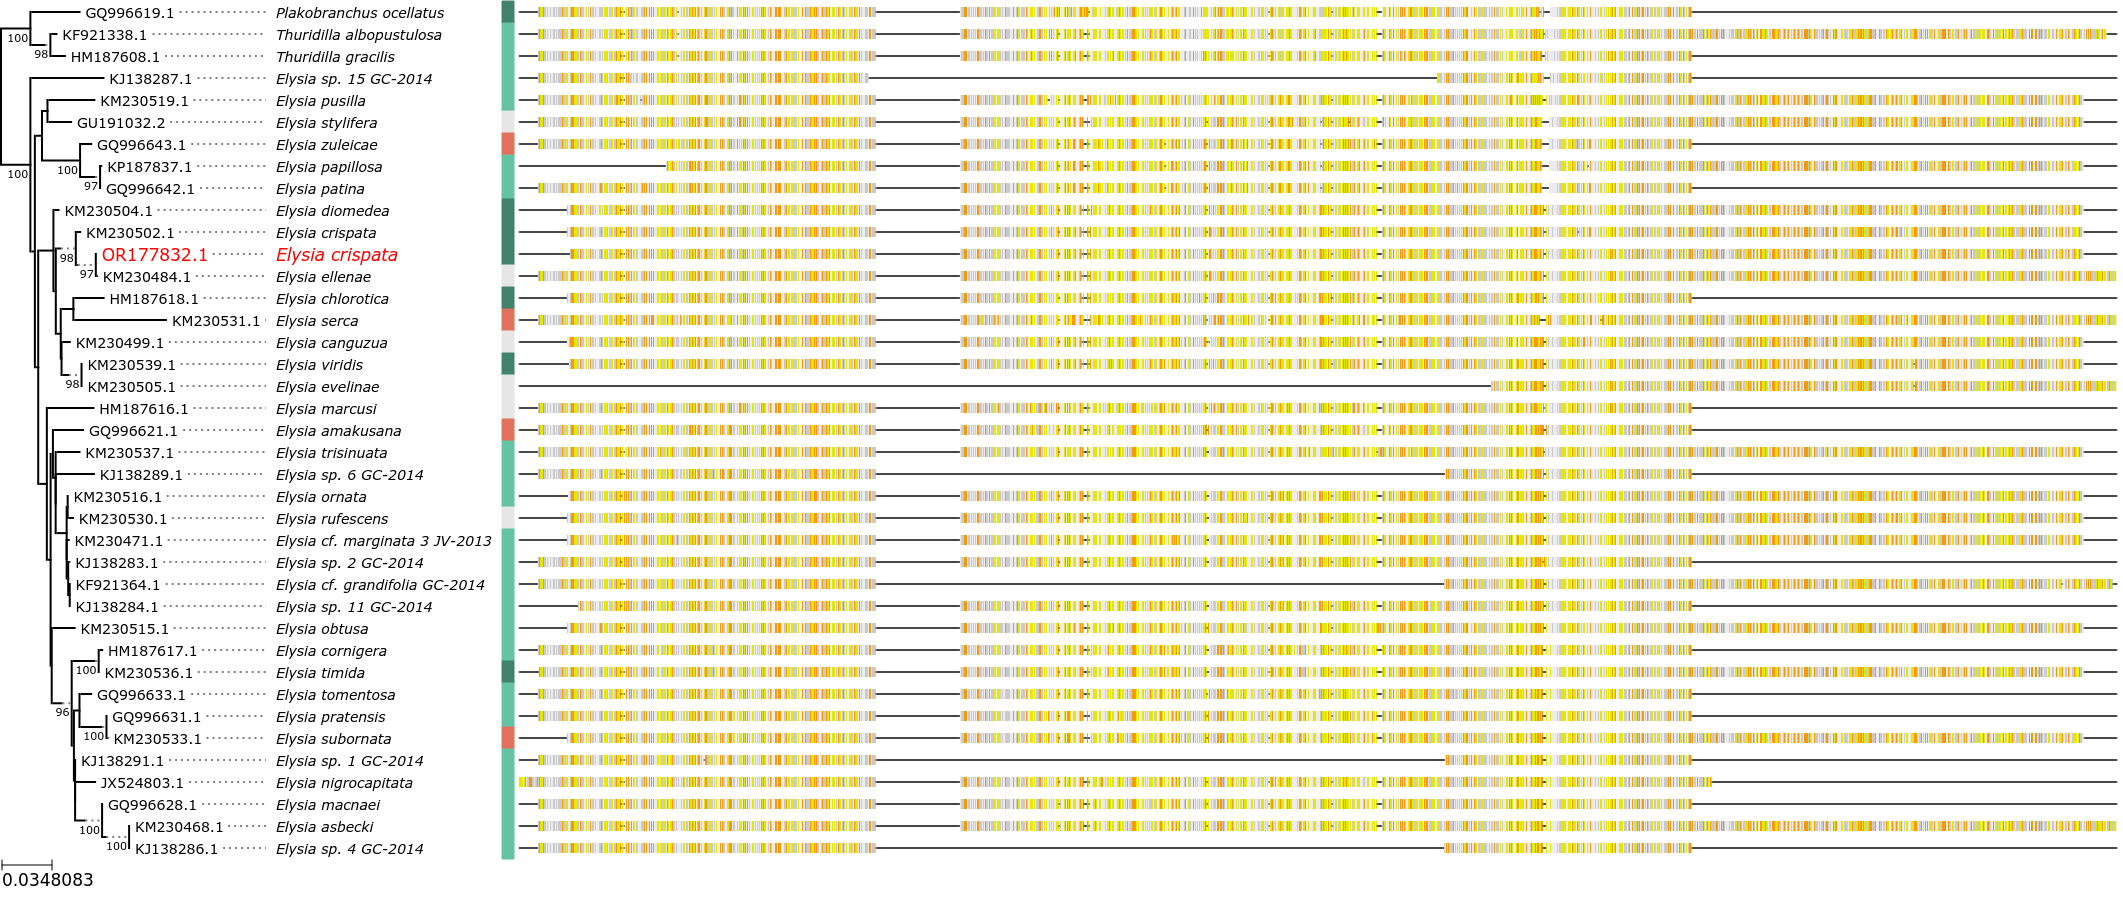

In [19]:
# render image on notebook or save to file
t.render(outfile, tree_style=ts)
t.render("%%inline", tree_style=ts)

# H3 phylogeny

In [20]:
treefile = '../../../../figshare/species_phylogeny/H3_ML.contree'
outfile = '../../../../figshare/species_phylogeny/H3_ML.pdf'
catfile = '../../../../figshare/species_phylogeny/retention_cats.txt'
alnfile = '../../../../figshare/species_phylogeny/H3.aln'
branch_min = 95

In [21]:
seqDict = {}
alnLen = 0
for record in SeqIO.parse(alnfile, "fasta"):
    name = record.id
    sequence = str(record.seq)
    #sequence = sequence.replace("n", "-")
    sequence = re.sub("[^ACGT]", '-', sequence)
    alnLen = len(sequence)
    seqDict[name] = sequence

In [22]:
# add species and lineage information to all leaves
# color target gene red 
# color all ME034 gene green

#t = PhyloTree(treefile, alignment=alnfile, alg_format="fasta")
t = Tree(treefile, format=2)
ancestor = t.get_common_ancestor("KF921442_Plakobranchus_ocellatus","KJ002535_Thuridilla_gracilis")
t.set_outgroup(ancestor)

t.ladderize(direction=0)
leafSet = set()

#print("Custom mode:")
for n in t.get_leaves():
    leafSet.add(n.name)
    #print(n.name)
    speciesname = ''
    genename = ''
    speciescat = ''
    speciescolor = ''

    
    tmp = n.name.split("_")
    genename = tmp.pop(0)
    speciesname = '_'.join(tmp)
    speciesname = speciesname.replace("_", " ")
    speciescat = catDict[speciesname]
    speciescolor = colorDict[speciescat]
    
    #print(speciesname, genename, speciescat, speciescolor)
    
    n.add_features(gene=genename)
    n.add_features(species=speciesname)
    n.add_features(cat=speciescat)

    # create a new label with a color attribute
    linF = AttrFace("cat", fgcolor=speciescolor, fsize=1)
    linF.background.color = speciescolor
    linF.margin_top = linF.margin_bottom = linF.margin_left = 10

    if genename == 'Ecla8331g639860.t1':
        speciesF = AttrFace("species", fsize=12, fgcolor='red', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10
        geneF = AttrFace("gene", fsize=12, fgcolor="red", fstyle="bold")
        geneF.margin_right = geneF.margin_left = 5
    
    else:
        speciesF = AttrFace("species", fsize=10, fgcolor='black', fstyle="italic")
        speciesF.margin_right = speciesF.margin_left = 10
        geneF = AttrFace("gene", fsize=10, fgcolor="black")
        geneF.margin_right = geneF.margin_left = 5

    # labels aligned to the same level
    n.add_face(speciesF, 0, position='aligned')
    n.add_face(geneF, 0, position='branch-right')
    n.add_face(linF, 1, position='aligned')
    
    my_motifs = [[0, alnLen, "compactseq", 2, 10, None, None, None]]
    seqF = SeqMotifFace(seq=seqDict[n.name], motifs=my_motifs, gap_format="blank")
    seqF.margin_right = seqF.margin_left = 5
    n.add_face(seqF, 2, "aligned")
    

In [23]:
# add lineage information to all internal nodes
style = NodeStyle()

style["size"] = 0
style["hz_line_width"] = 2
style["vt_line_width"] = 2
t.set_style(style)

for n in t.iter_descendants("postorder"):
    #print(n.name)
                
    style["size"] = 0
    style["hz_line_width"] = 2
    style["vt_line_width"] = 2
    n.set_style(style)
        
    #print(n.support, n.name)

    if float(n.support) >= branch_min and n.name not in leafSet:
        #print(int(n.support))
        n.add_features(bootstrap=int(n.support))

        supF = AttrFace("bootstrap", fgcolor="#000000", fsize=8)
        supF.margin_right = supF.margin_left = 3
        n.add_face(supF, 0, position='branch-bottom')
    

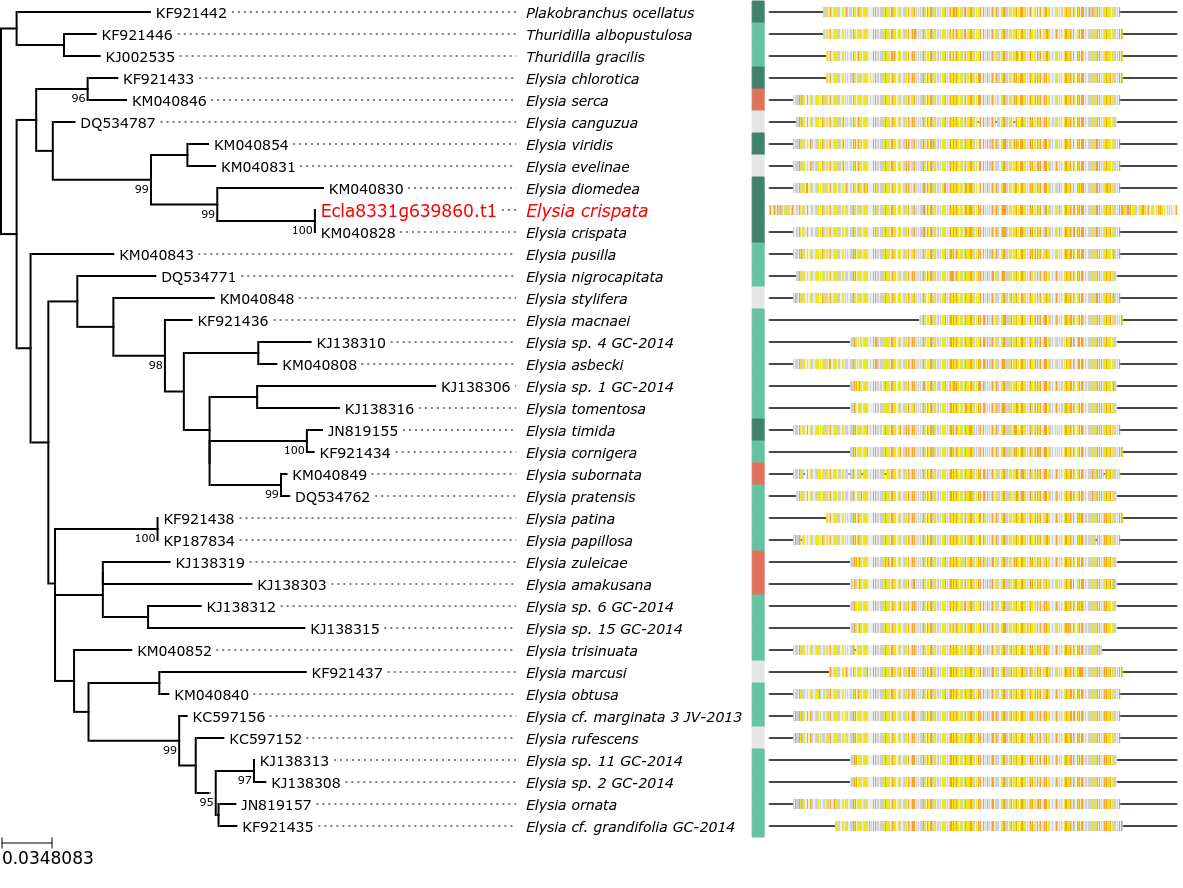

In [24]:
# render image on notebook or save to file
t.render(outfile, tree_style=ts)
t.render("%%inline", tree_style=ts)